In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix
import tabulate
from IPython.display import HTML, display
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Load it up
file = "train_ver2_500000.csv"
file_2 = "test_ver2.csv.zip"

train = pd.read_csv(file)
test = pd.read_csv(file_2)

/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_47900/1571020159.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(file)
/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_47900/1571020159.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(file_2)


In [3]:
train.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
train.shape

(499999, 48)

In [5]:
#The data type seems to be mixed, "age" shouldn't be an object. Let's look deeper
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             499999 non-null  object 
 1   ncodpers               499999 non-null  int64  
 2   ind_empleado           494610 non-null  object 
 3   pais_residencia        494610 non-null  object 
 4   sexo                   494609 non-null  object 
 5   age                    499999 non-null  object 
 6   fecha_alta             494610 non-null  object 
 7   ind_nuevo              494610 non-null  float64
 8   antiguedad             499999 non-null  object 
 9   indrel                 494610 non-null  float64
 10  ult_fec_cli_1t         660 non-null     object 
 11  indrel_1mes            494610 non-null  float64
 12  tiprel_1mes            494610 non-null  object 
 13  indresi                494610 non-null  object 
 14  indext                 494610 non-nu

In [6]:
train.isnull().sum()/train.shape[0] * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              1.077802
pais_residencia           1.077802
sexo                      1.078002
age                       0.000000
fecha_alta                1.077802
ind_nuevo                 1.077802
antiguedad                0.000000
indrel                    1.077802
ult_fec_cli_1t           99.868000
indrel_1mes               1.077802
tiprel_1mes               1.077802
indresi                   1.077802
indext                    1.077802
conyuemp                 99.982200
canal_entrada             1.085802
indfall                   1.077802
tipodom                   1.077802
cod_prov                  1.559003
nomprov                   1.559003
ind_actividad_cliente     1.077802
renta                    17.780236
segmento                  1.088602
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [7]:
numerical_features = train.select_dtypes(include=['int64', 'float64'])
categorical_features = train.select_dtypes(include=['object'])

numerical_features

,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,0.0,1.0,1.0,1.0,29.0,1.0,87218.10,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,0.0,1.0,1.0,1.0,13.0,0.0,35548.74,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,0.0,1.0,1.0,1.0,13.0,0.0,122179.11,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,0.0,1.0,1.0,1.0,50.0,0.0,119775.54,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,0.0,1.0,1.0,1.0,50.0,1.0,NaN,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,662262,0.0,1.0,1.0,1.0,28.0,1.0,51093.54,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
499995,662260,0.0,1.0,1.0,1.0,39.0,0.0,69038.16,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
499996,662206,0.0,1.0,1.0,1.0,7.0,0.0,194285.31,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
499997,662210,0.0,1.0,1.0,1.0,28.0,0.0,234398.46,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
#I see a lot of numericals that should not be in the categorical
categorical_features

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
0,2015-01-28,N,ES,H,35,2015-01-12,6,NaN,A,S,N,NaN,KHL,N,MALAGA,02 - PARTICULARES
1,2015-01-28,N,ES,V,23,2012-08-10,35,NaN,I,S,S,NaN,KHE,N,CIUDAD REAL,03 - UNIVERSITARIO
2,2015-01-28,N,ES,V,23,2012-08-10,35,NaN,I,S,N,NaN,KHE,N,CIUDAD REAL,03 - UNIVERSITARIO
3,2015-01-28,N,ES,H,22,2012-08-10,35,NaN,I,S,N,NaN,KHD,N,ZARAGOZA,03 - UNIVERSITARIO
4,2015-01-28,N,ES,V,23,2012-08-10,35,NaN,A,S,N,NaN,KHE,N,ZARAGOZA,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,2015-01-28,N,ES,H,40,2006-12-11,103,NaN,A,S,N,NaN,KFC,N,MADRID,02 - PARTICULARES
499995,2015-01-28,N,ES,V,31,2006-12-11,103,NaN,I,S,N,NaN,KFC,N,CANTABRIA,02 - PARTICULARES
499996,2015-01-28,N,ES,H,29,2006-12-11,103,NaN,I,S,N,NaN,KAT,N,"BALEARS, ILLES",02 - PARTICULARES
499997,2015-01-28,N,ES,V,52,2006-12-11,103,NaN,I,S,N,NaN,KFC,N,MADRID,02 - PARTICULARES


In [9]:
#Transform data into proper types
train.age = pd.to_numeric(train.age, errors='coerce')
train.renta = pd.to_numeric(train.renta, errors='coerce')
train.antiguedad = pd.to_numeric(train.antiguedad, errors='coerce')
train.fecha_alta = pd.to_datetime(train.fecha_alta, errors = 'coerce')
train['fecha_dato'] = pd.to_datetime(train['fecha_dato'])

test.age = pd.to_numeric(test.age, errors='coerce')
test.renta = pd.to_numeric(test.renta, errors='coerce')
test.antiguedad = pd.to_numeric(test.antiguedad, errors='coerce')
test.fecha_alta = pd.to_datetime(test.fecha_alta, errors = 'coerce')
test['fecha_dato'] = pd.to_datetime(test['fecha_dato'])


In [10]:
categorical_features = train.select_dtypes(include=['object'])
numerical_features = train.select_dtypes(include=['int64', 'float64'])


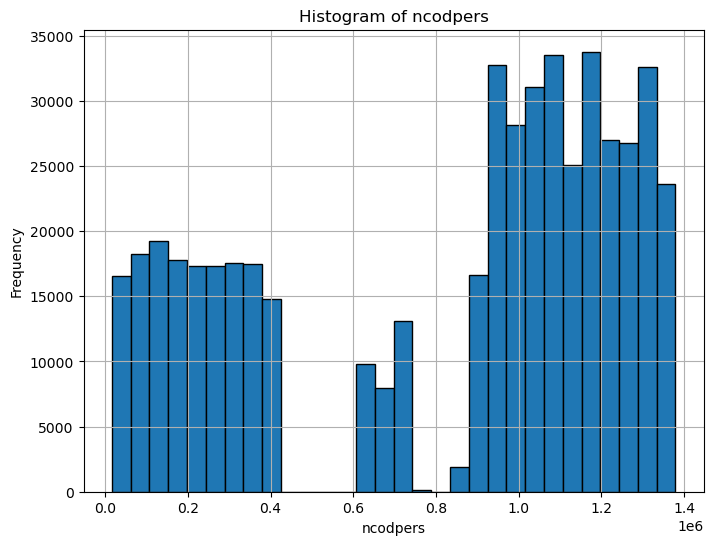

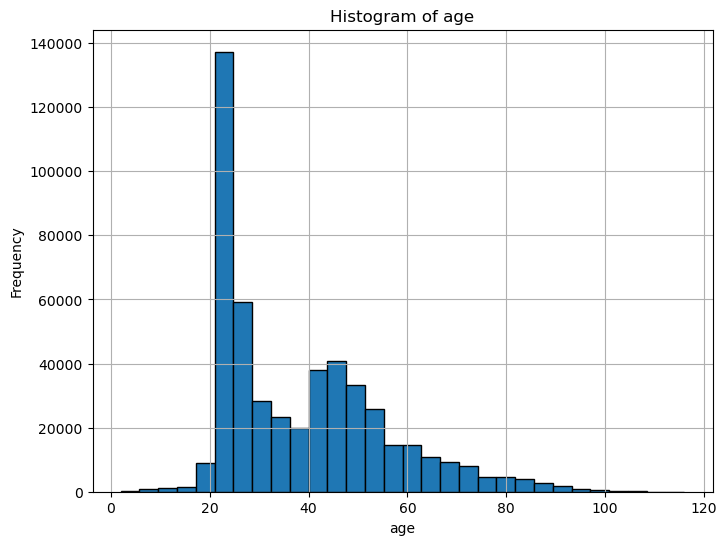

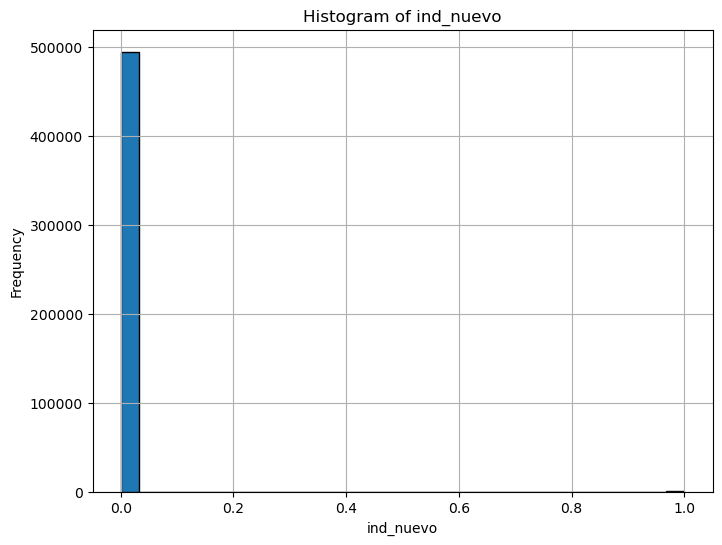

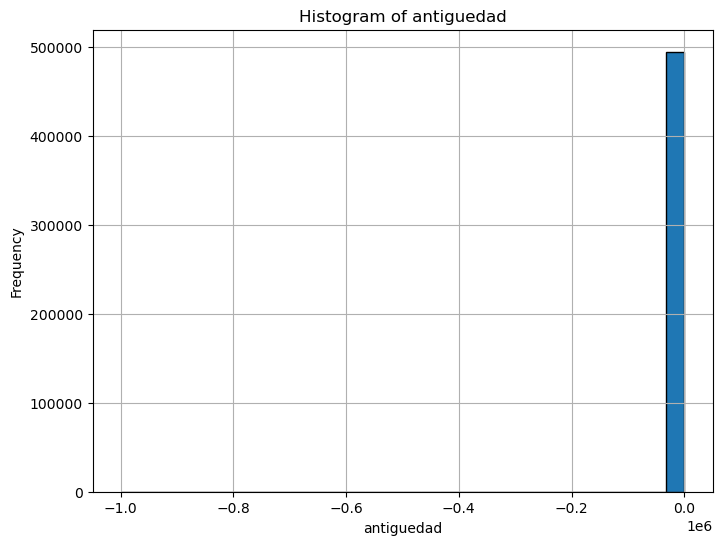

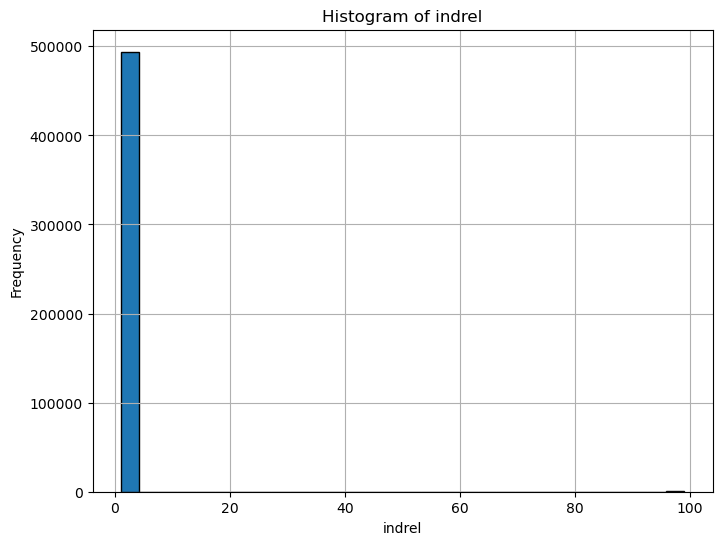

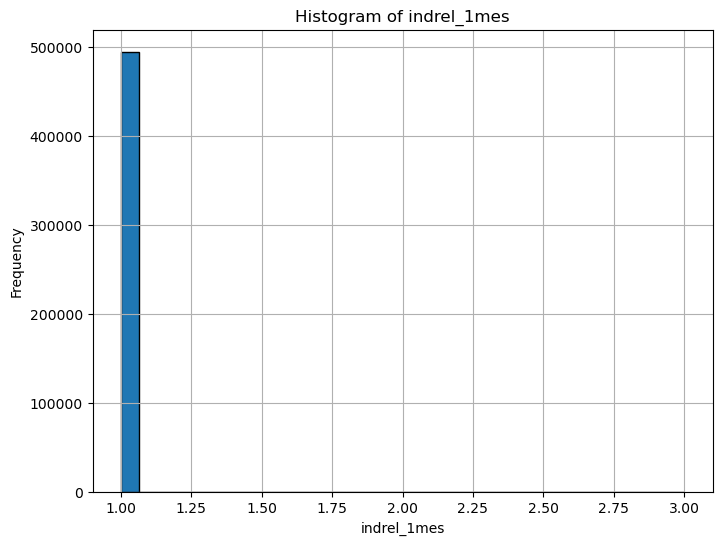

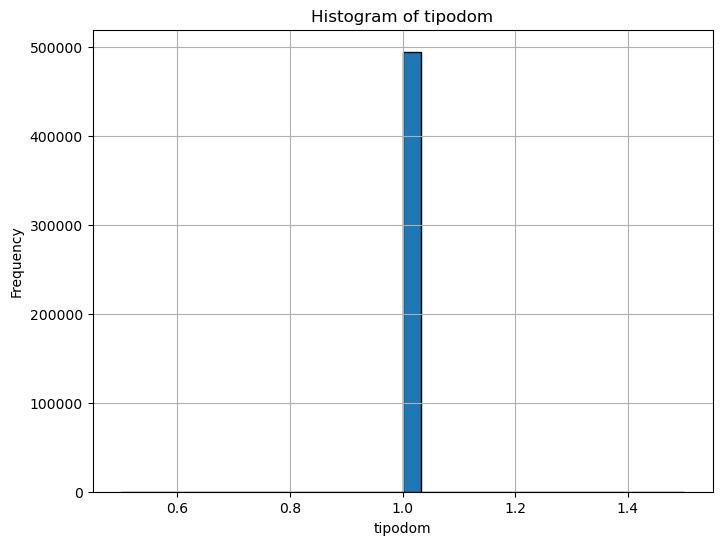

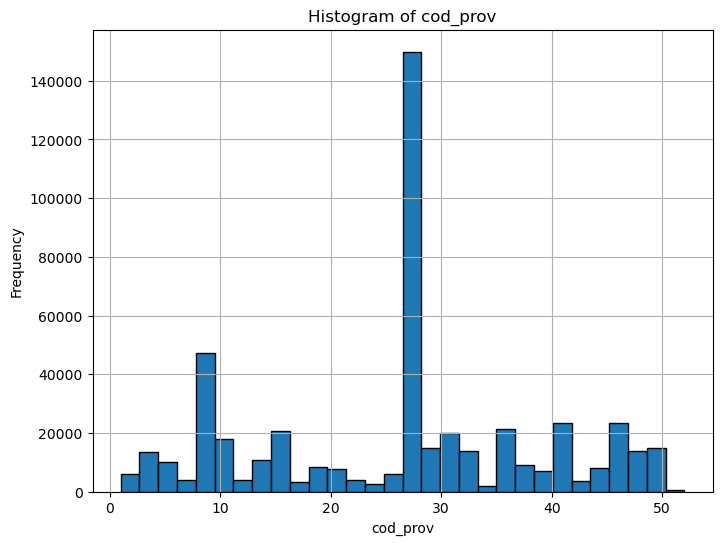

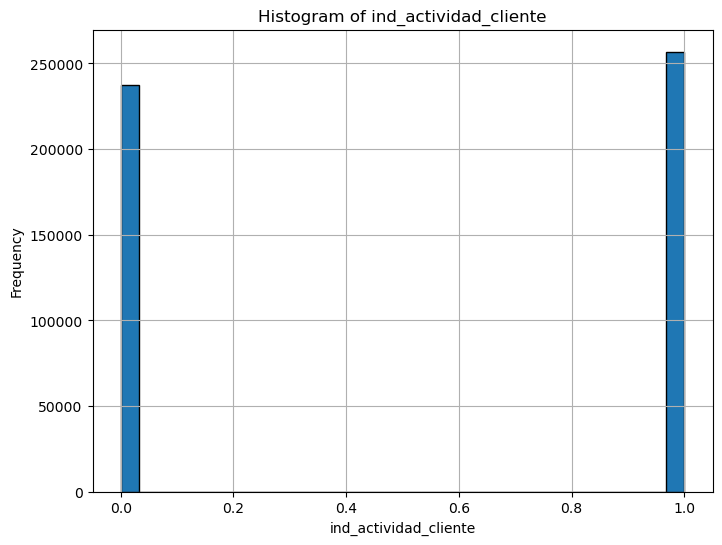

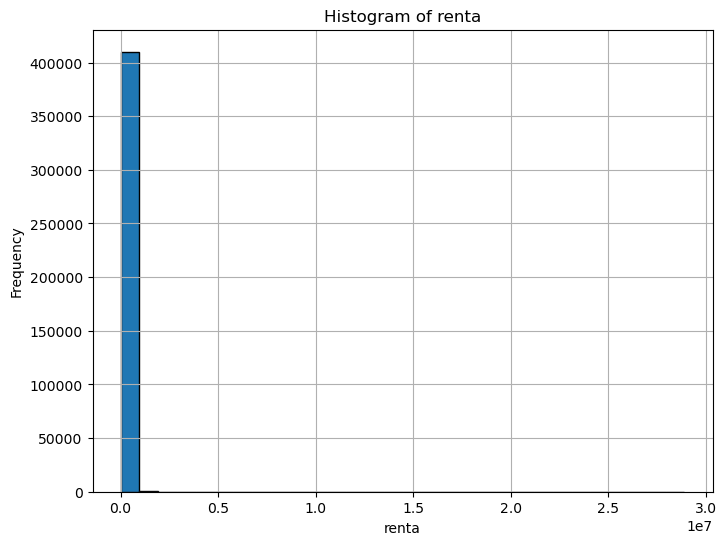

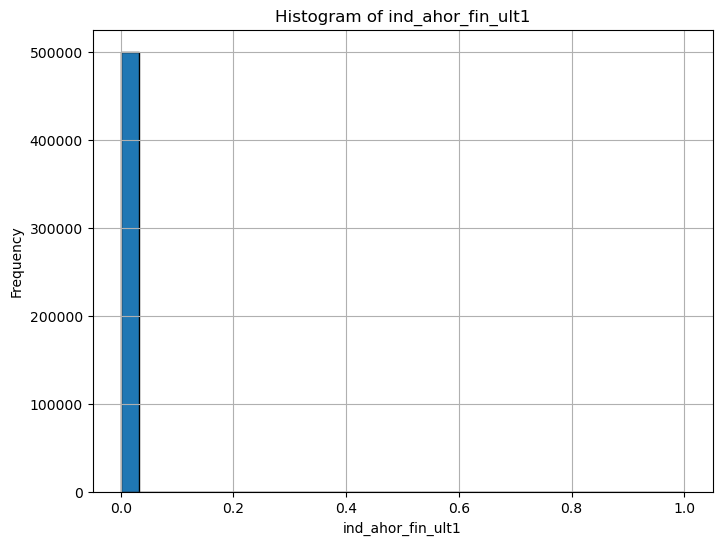

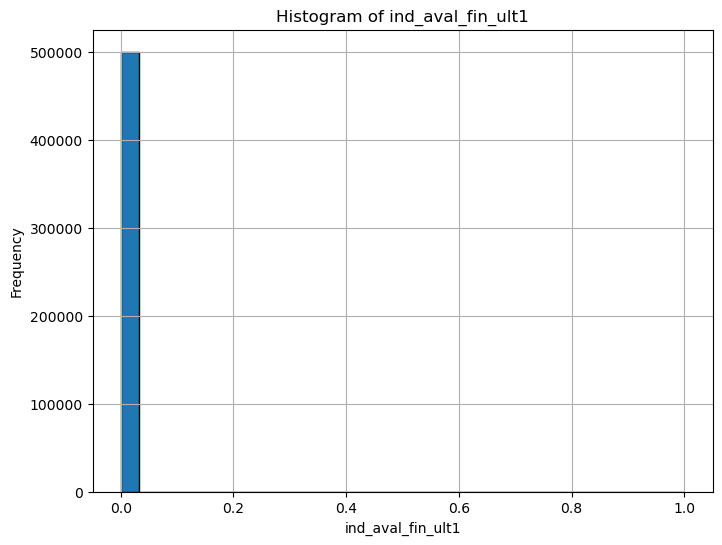

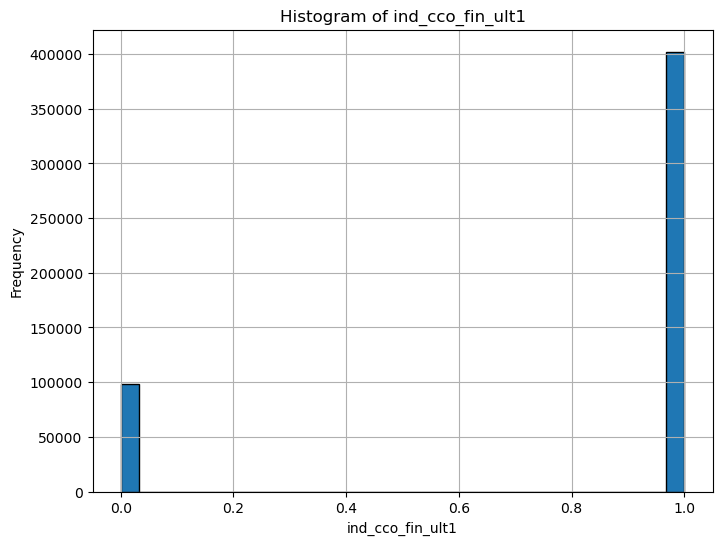

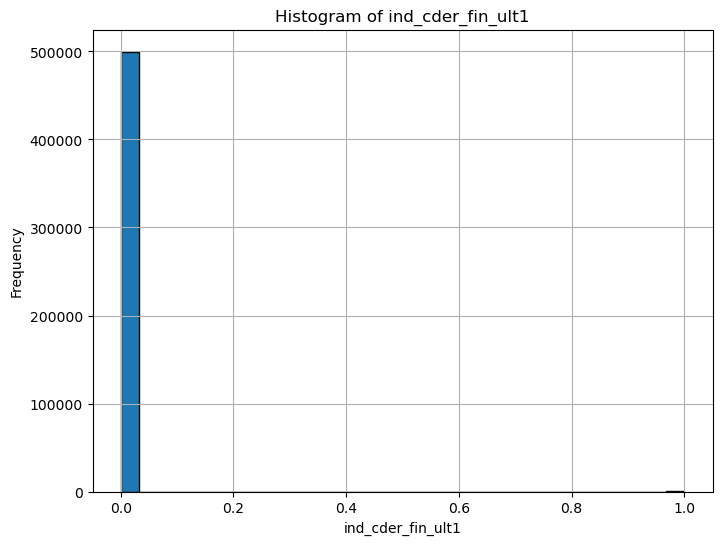

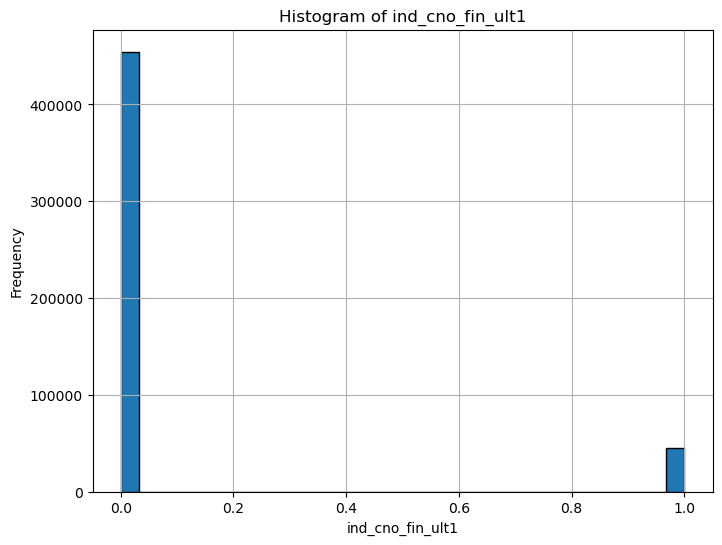

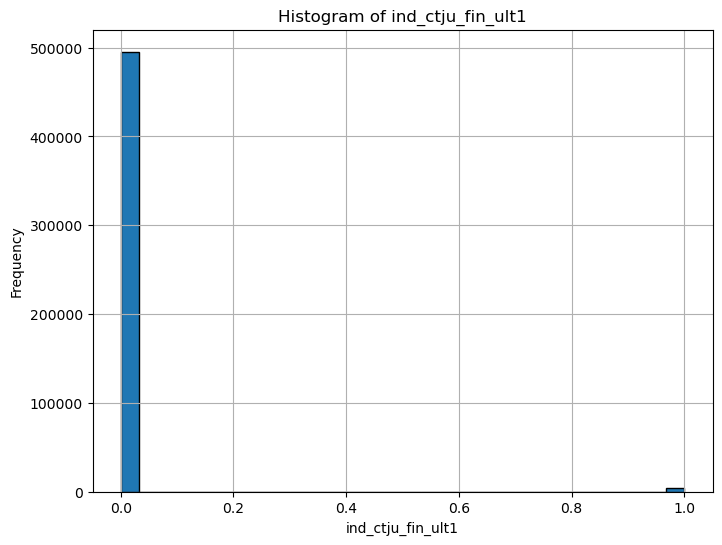

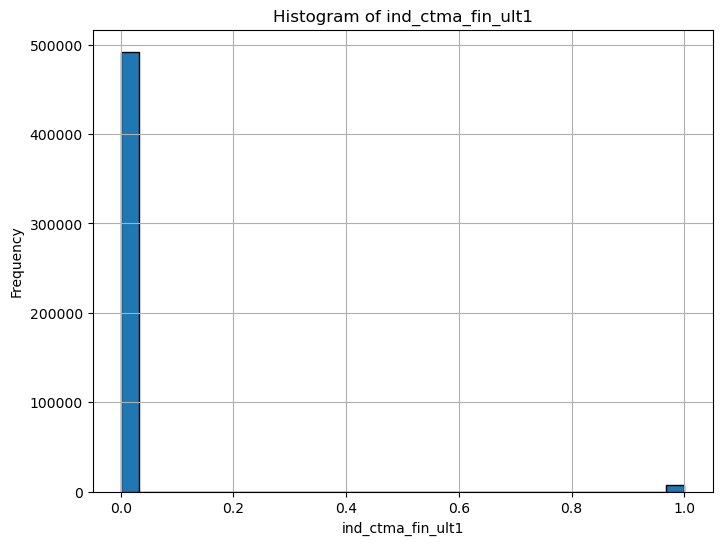

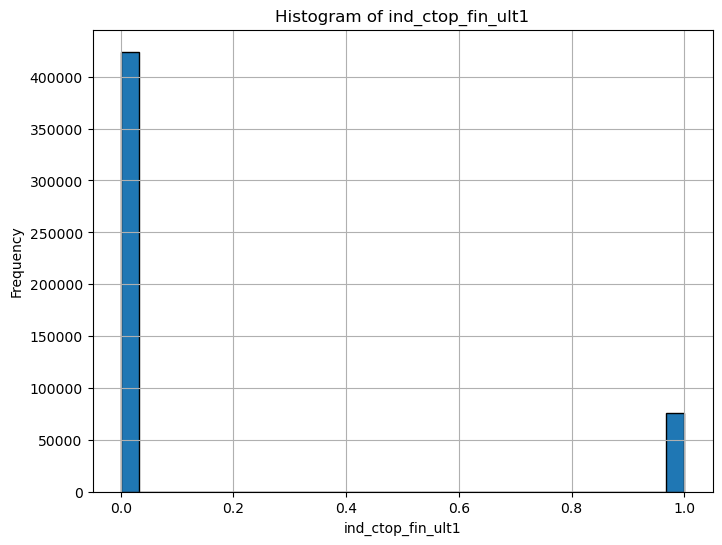

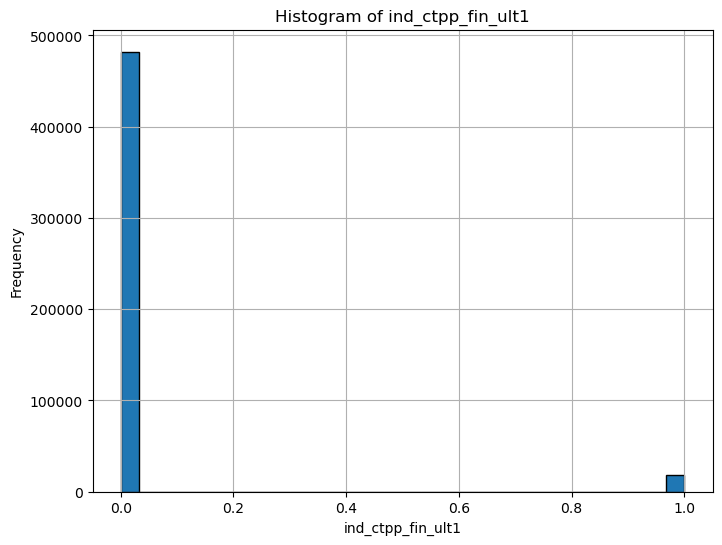

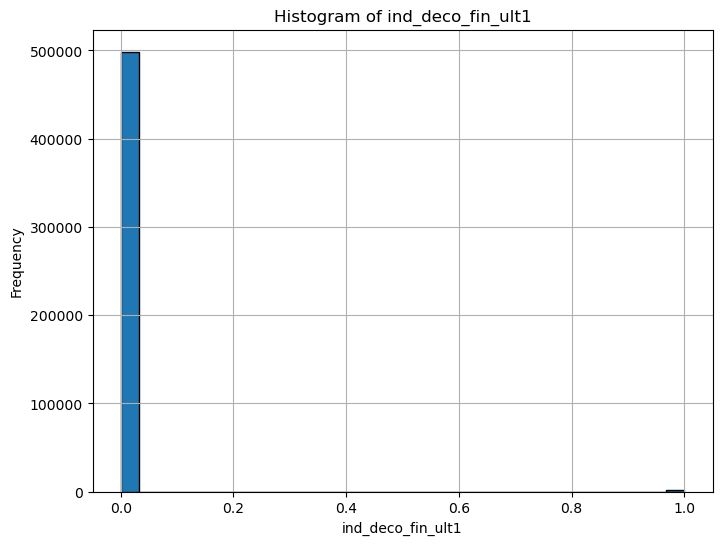

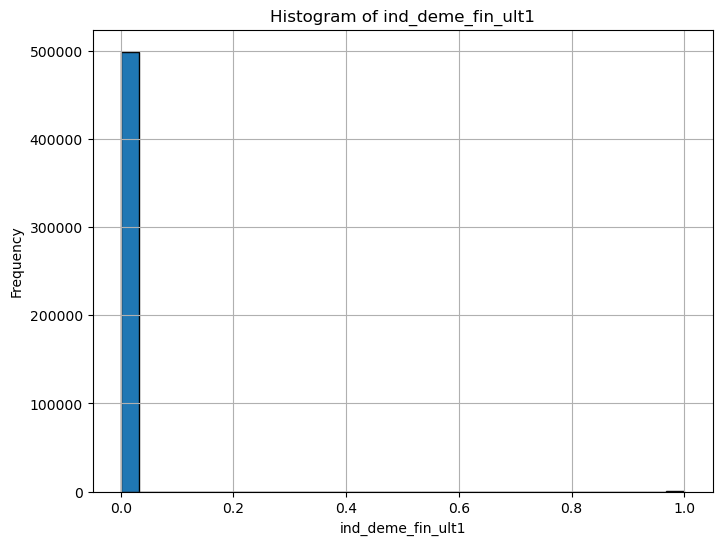

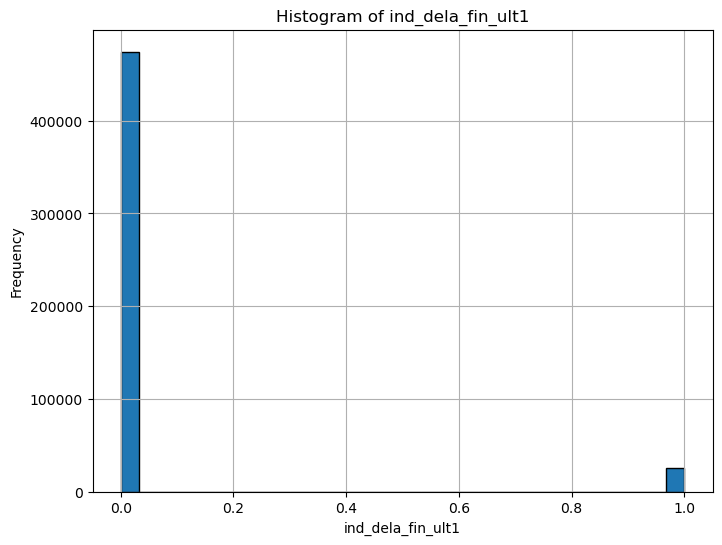

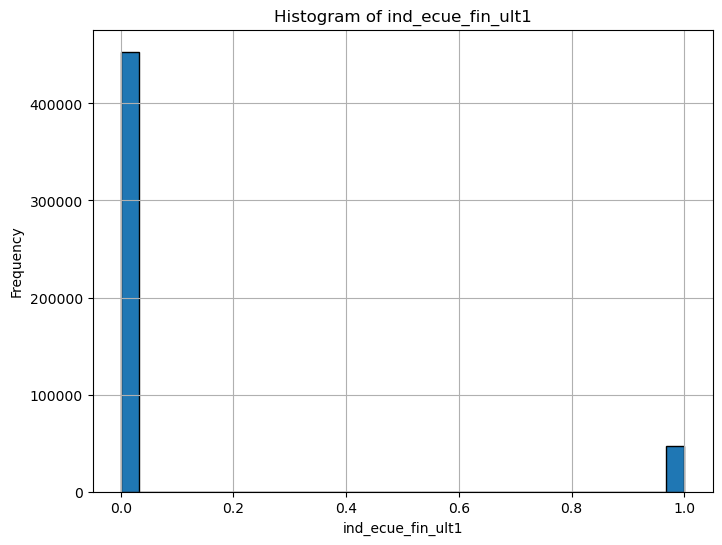

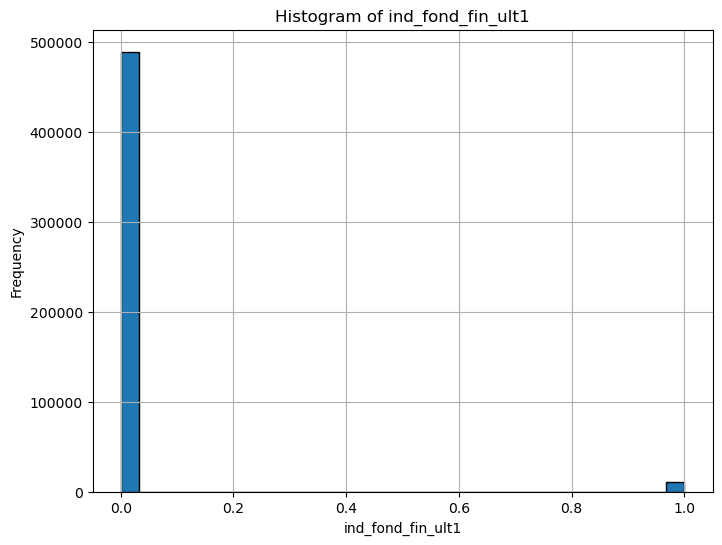

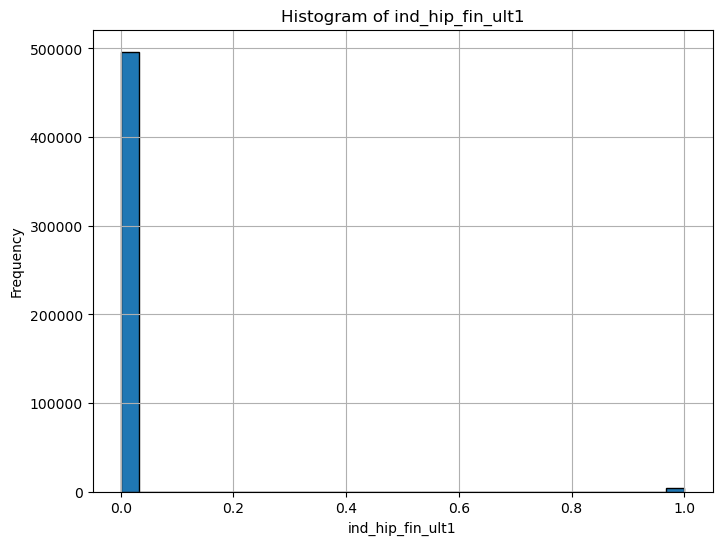

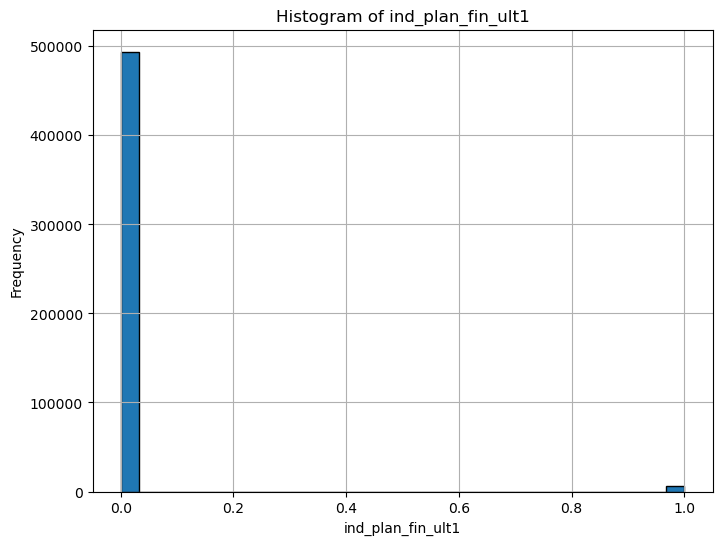

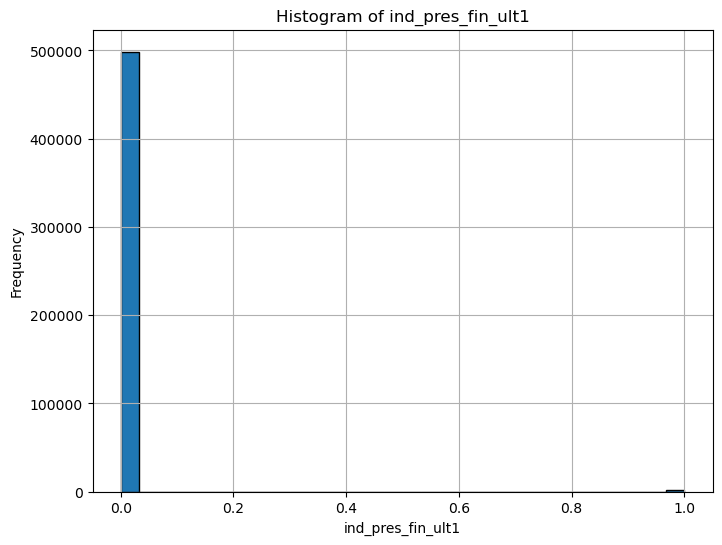

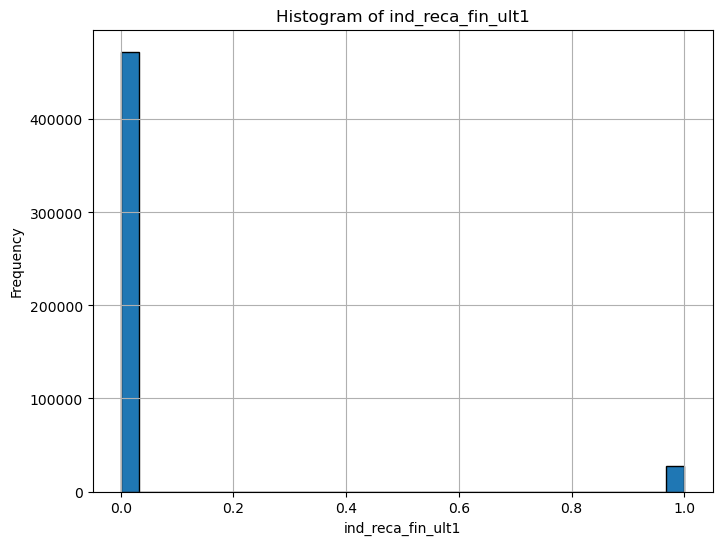

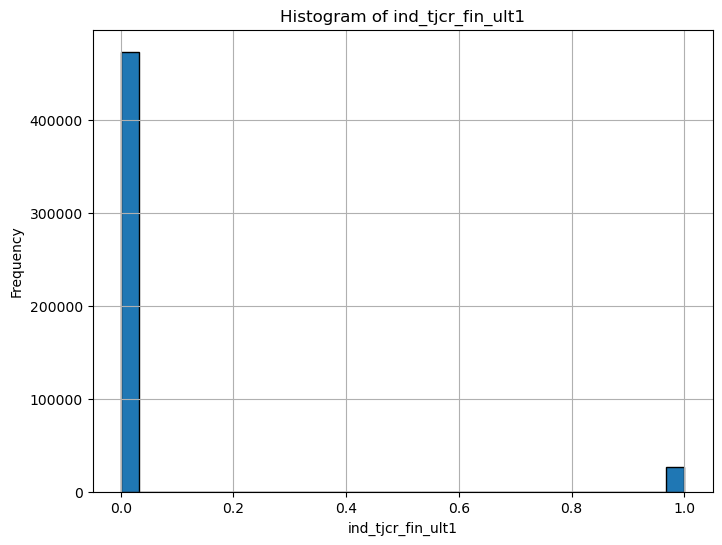

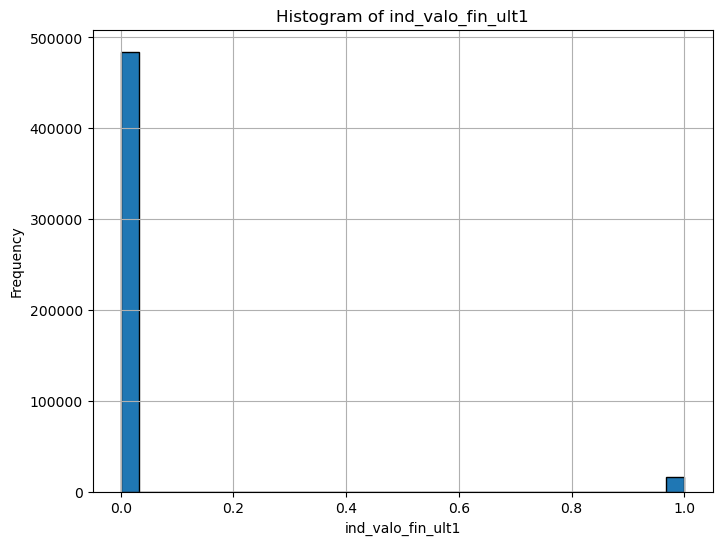

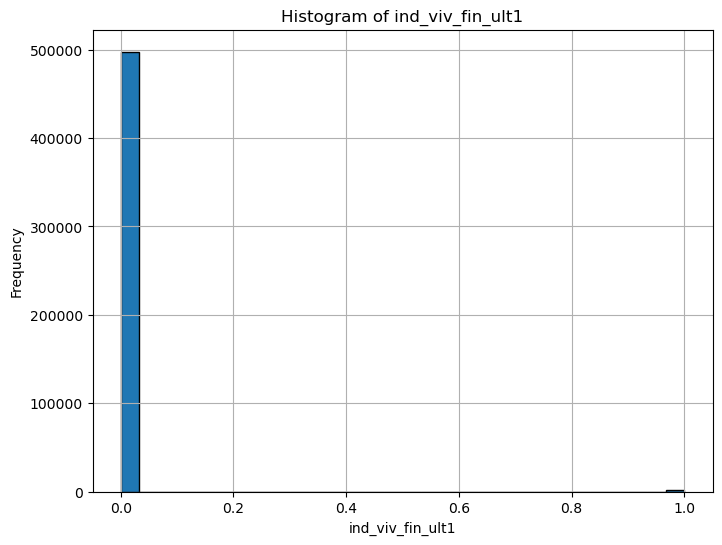

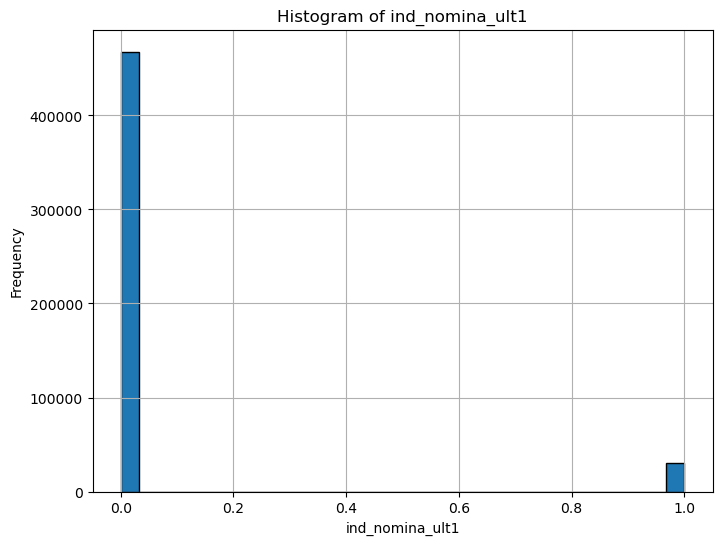

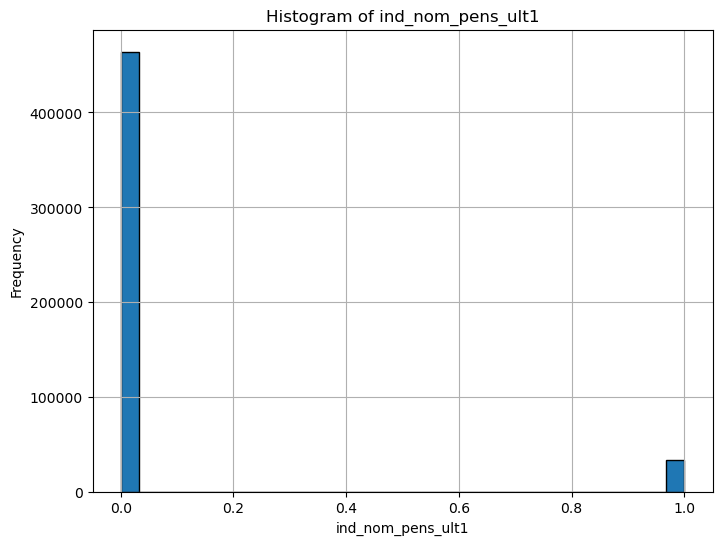

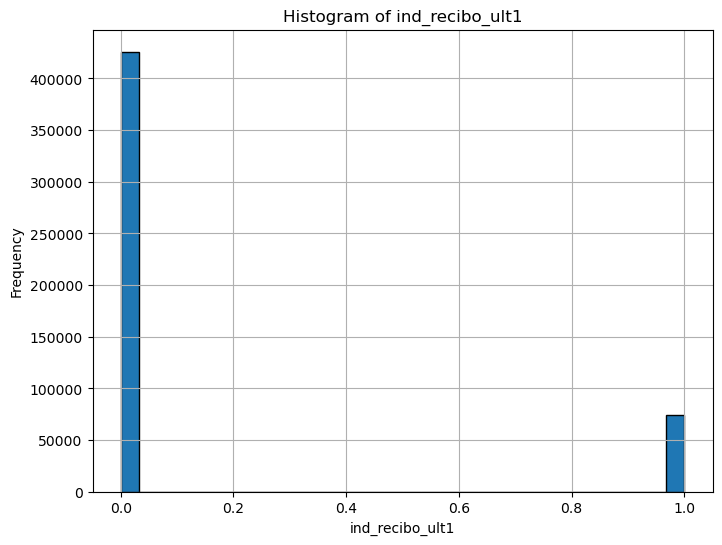

In [11]:
#Data visualization
for feat in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(train[feat].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

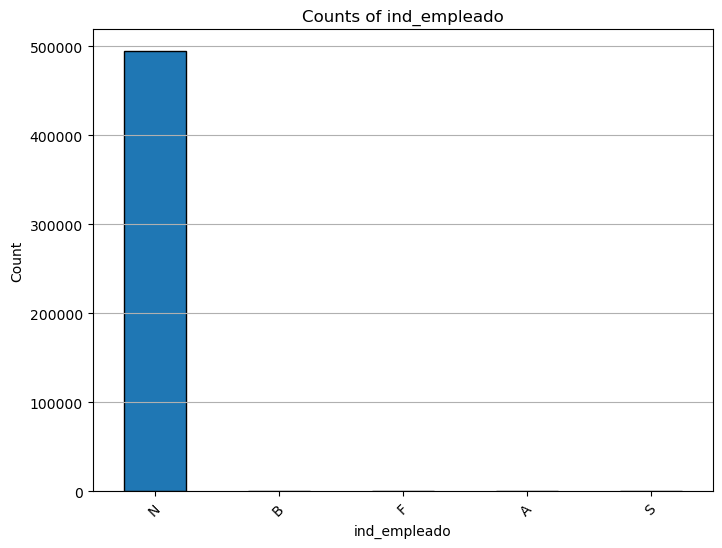

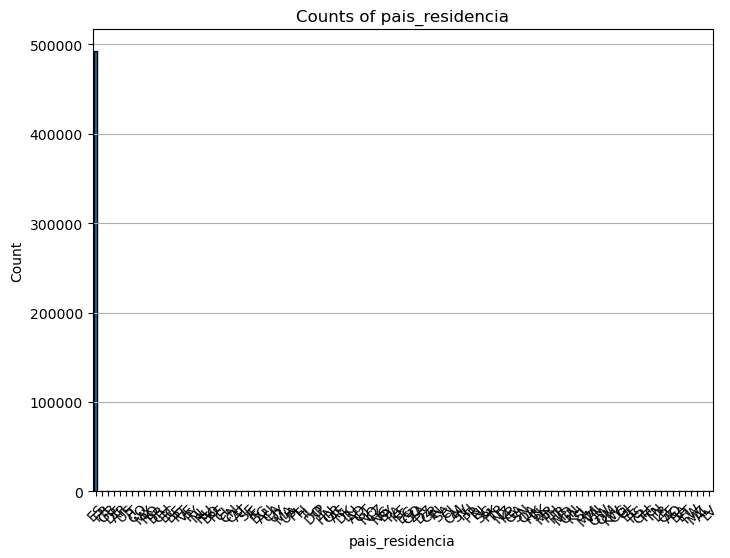

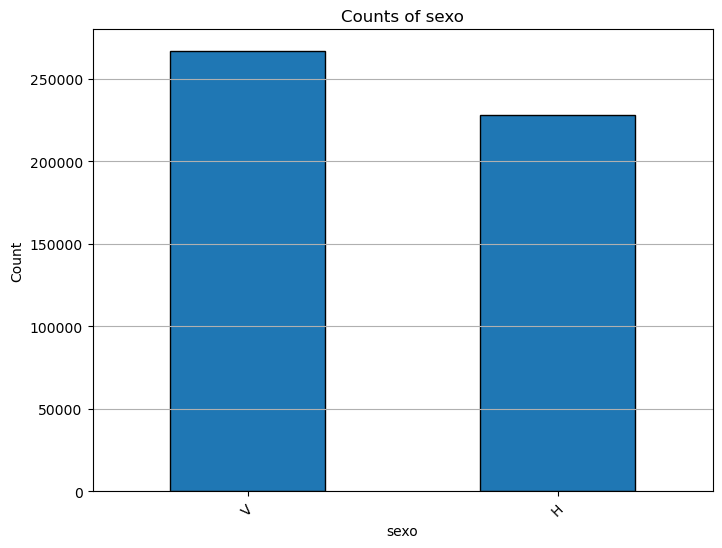

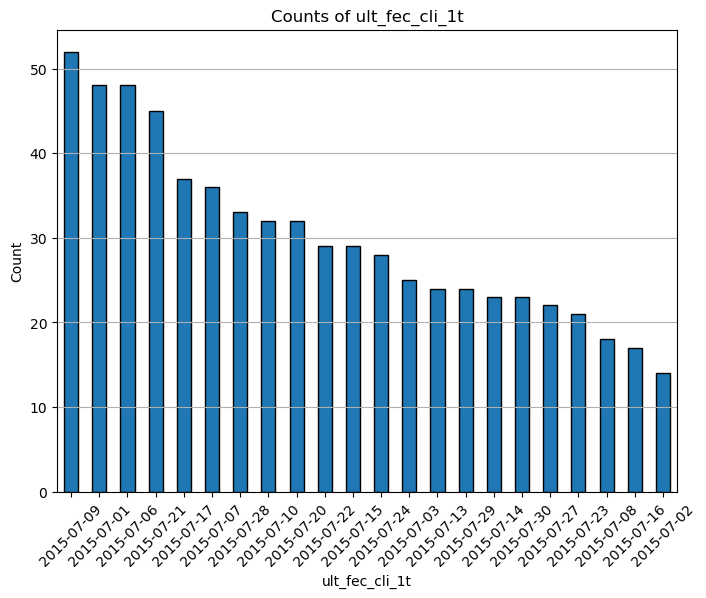

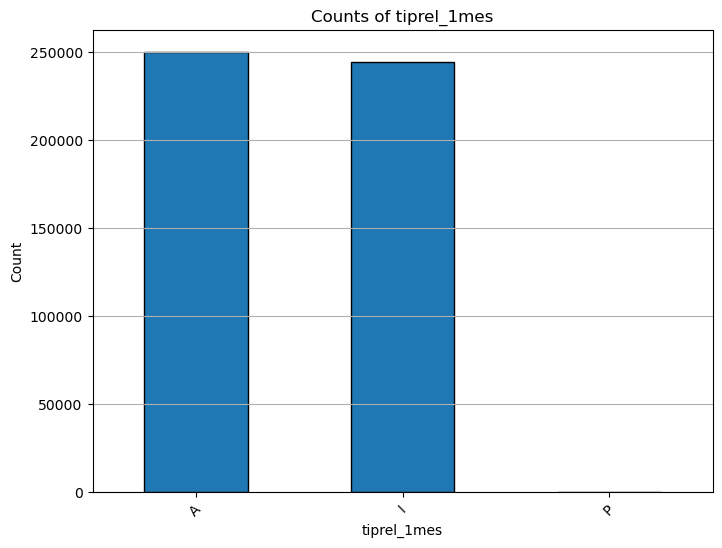

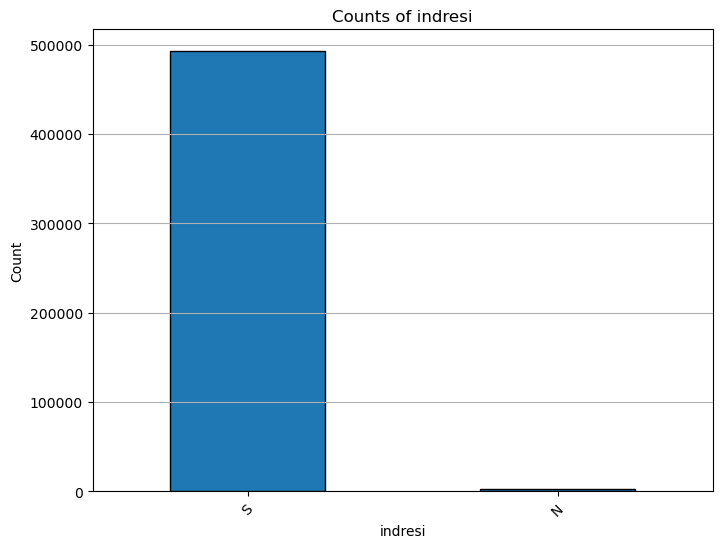

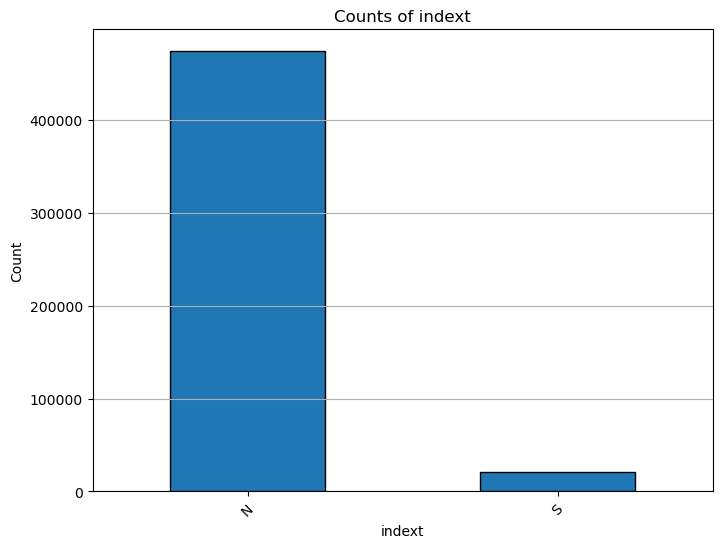

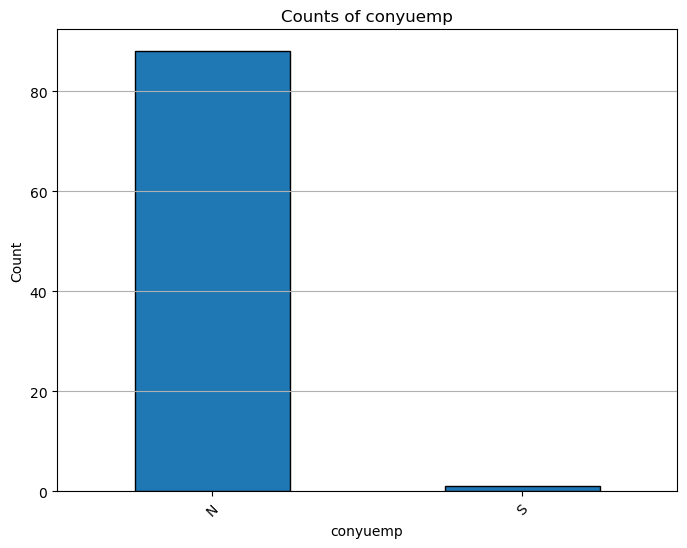

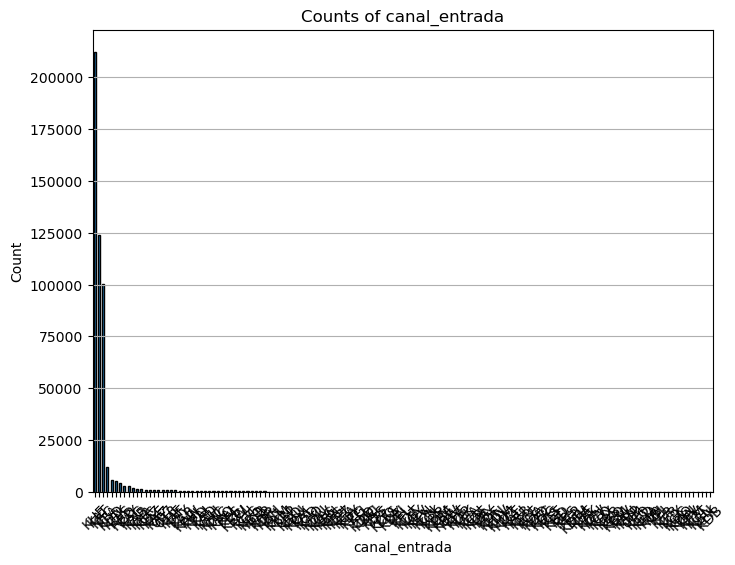

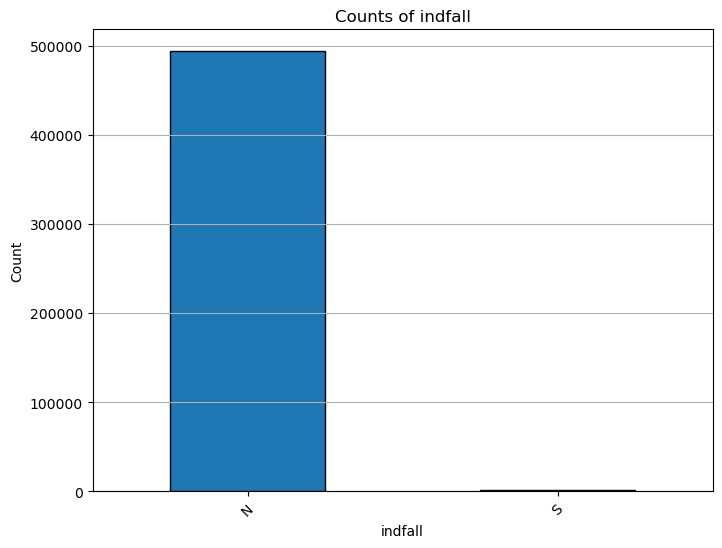

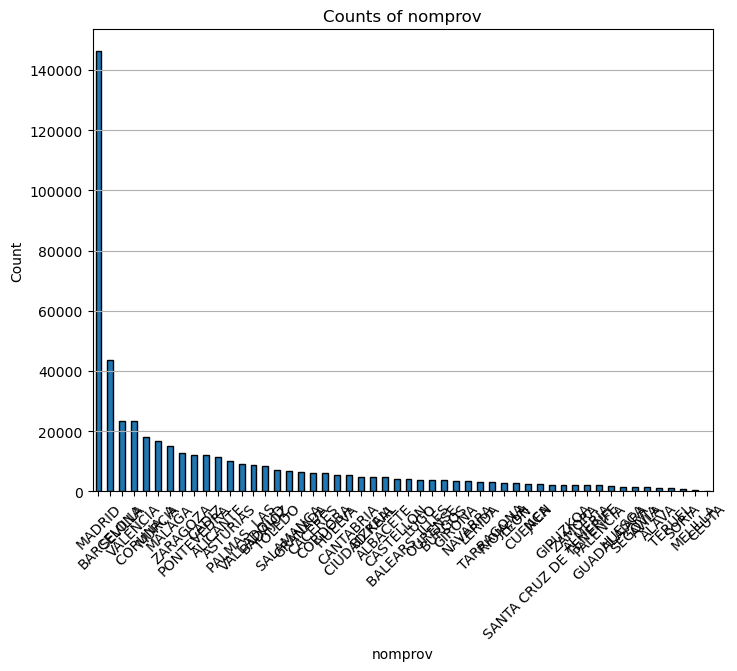

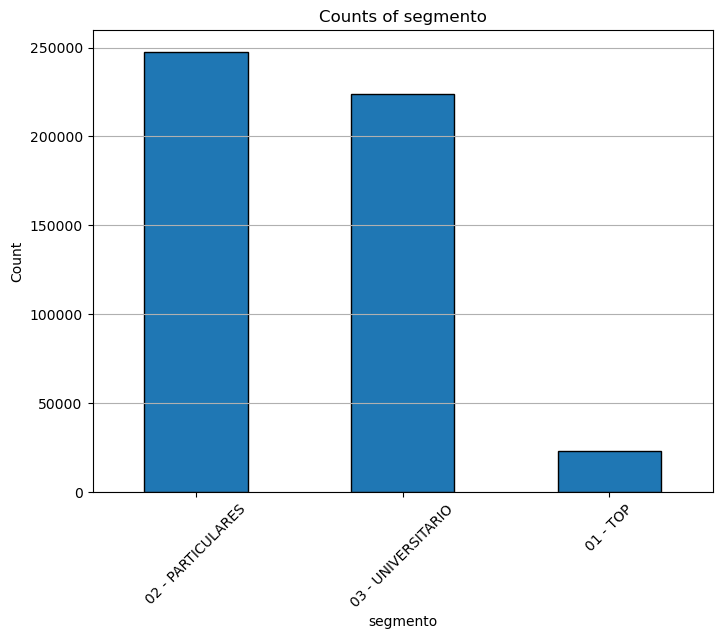

In [12]:
# Plot bar plots for categorical features
for feat in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    train[feat].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Counts of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_47900/1234701875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


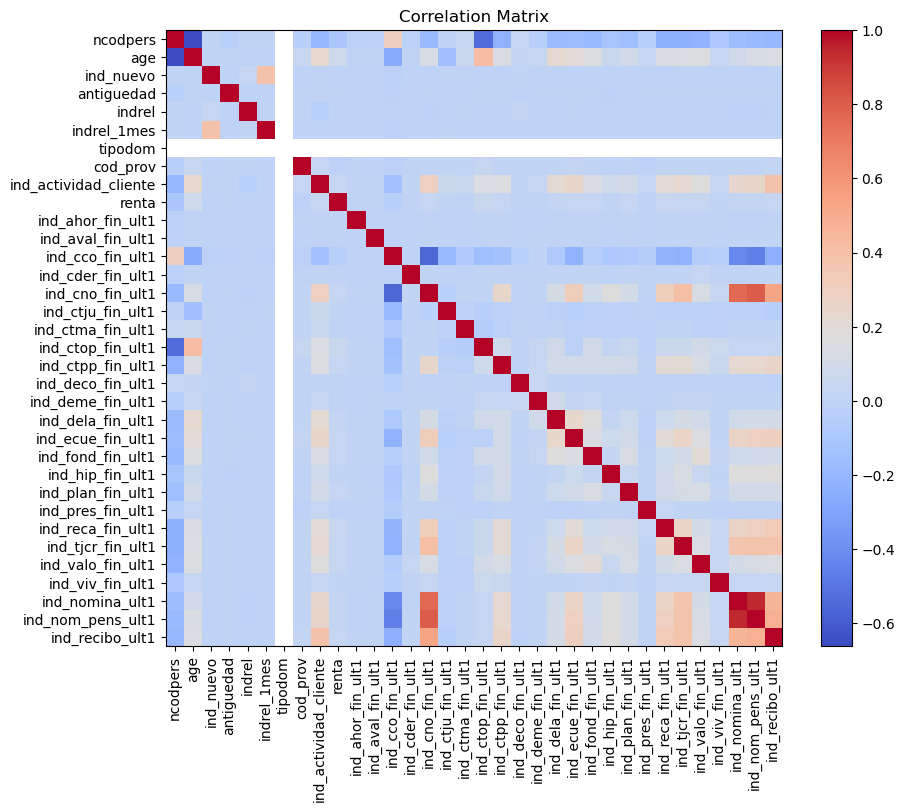

In [13]:
corr_matrix = train.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

This seems to be bad data, the distribution doesn't make a lot of sense

In [14]:
train.isnull().sum()/train.shape[0] * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              1.077802
pais_residencia           1.077802
sexo                      1.078002
age                       1.077802
fecha_alta                1.077802
ind_nuevo                 1.077802
antiguedad                1.077802
indrel                    1.077802
ult_fec_cli_1t           99.868000
indrel_1mes               1.077802
tiprel_1mes               1.077802
indresi                   1.077802
indext                    1.077802
conyuemp                 99.982200
canal_entrada             1.085802
indfall                   1.077802
tipodom                   1.077802
cod_prov                  1.559003
nomprov                   1.559003
ind_actividad_cliente     1.077802
renta                    17.780236
segmento                  1.088602
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [15]:
#Drop 99% missing columns, and feaatures I think might be irrelevant

train = train.drop(columns=['ult_fec_cli_1t', 'conyuemp', 'fecha_dato', 'fecha_alta'])
test = test.drop(columns=['ult_fec_cli_1t', 'conyuemp', 'fecha_dato', 'fecha_alta'])
train['ind_nomina_ult1'].fillna(train['ind_nomina_ult1'].mean(), inplace=True)
train['ind_nom_pens_ult1'].fillna(train['ind_nom_pens_ult1'].mean(), inplace=True)


missing_features = ['ind_empleado', 'pais_residencia', 'sexo', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 
                  'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']

#Replace few missing values with the most frequent value

for i in missing_features:
    train.loc[train[i].isnull(), i] = train[i].value_counts().index[0]
    test.loc[test[i].isnull(), i] = test[i].value_counts().index[0]

In [16]:
#Let's group age and income

age_group = [0, 21, 40, 65, 120]
age_labels = ['Young', 'Young Adult', 'Adult', 'Old']
train['age_grouped'] = pd.cut(train.age, bins = age_group, labels = age_labels)
test['age_grouped'] = pd.cut(test.age, bins = age_group, labels = age_labels)

#train_income_group = [0, np.nanpercentile(train['renta'], 25), np.nanpercentile(train['renta'], 50), np.nanpercentile(train['renta'], 75), np.nanpercentile(train['renta'], 100)]
#test_income_group = [0, np.nanpercentile(test['renta'], 25), np.nanpercentile(test['renta'], 50), np.nanpercentile(test['renta'], 75), np.nanpercentile(test['renta'], 100)]
income_labels = ['Low','Ordinary','Median-high','High']

#train['income_grouped'] = pd.cut(train['renta'], train_income_group, labels = income_labels)
#test['income_grouped'] = pd.cut(test['renta'], test_income_group, labels = income_labels)

In [17]:
#This doesn't look right

print(train['age_grouped'].value_counts())
print(train['income_grouped'].value_counts())

Young Adult    252898
Adult          166771
Young           41357
Old             38973
Name: age_grouped, dtype: int64
Low            125000
Ordinary       125000
High           125000
Median-high    124999
Name: income_grouped, dtype: int64


In [18]:
#Different approach

income_thresholds = [0, 50000, 100000, 150000, np.inf]

# Create income groups using pd.cut
train['income_grouped'] = pd.cut(train['renta'], bins=income_thresholds, labels=income_labels)
test['income_grouped'] = pd.cut(test['renta'], bins=income_thresholds, labels=income_labels)

In [19]:
print(train['income_grouped'].value_counts())

High           195775
Ordinary       159998
Median-high     98230
Low             45996
Name: income_grouped, dtype: int64


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ncodpers               499999 non-null  int64   
 1   ind_empleado           499999 non-null  object  
 2   pais_residencia        499999 non-null  object  
 3   sexo                   499999 non-null  object  
 4   age                    499999 non-null  float64 
 5   ind_nuevo              499999 non-null  float64 
 6   antiguedad             499999 non-null  float64 
 7   indrel                 499999 non-null  float64 
 8   indrel_1mes            499999 non-null  float64 
 9   tiprel_1mes            499999 non-null  object  
 10  indresi                499999 non-null  object  
 11  indext                 499999 non-null  object  
 12  canal_entrada          499999 non-null  object  
 13  indfall                499999 non-null  object  
 14  tipodom             

In [21]:
#Let's make sure they're in the correct format again

train['age_grouped'] = train['age_grouped'].astype(str)
test['age_grouped'] = test['age_grouped'].astype(str)

train['income_grouped'] = train['income_grouped'].astype(str)
test['income_grouped'] = test['income_grouped'].astype(str)

categorical_features = train.select_dtypes(include=['object']).columns
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

In [22]:
#Encoding

encoder=OneHotEncoder()

encoder.fit(train[categorical_features])

encoded=pd.DataFrame(encoder.transform(train[categorical_features]).toarray())
train=train.drop(columns=categorical_features)
train=train.reset_index().drop('index', axis=1)
train=pd.concat([train, encoded], axis=1)
train.columns=train.columns.astype(str)

In [23]:
target_variables = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 
                    'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 
                    'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 
                    'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 
                    'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 
                    'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [30]:
X = train.drop(columns=target_variables)
y_train = train[target_variables]
y_val = val[target_variables]
y_train_binary = (y_train > 0.5).astype(int)
y_val_binary = (y_val > 0.5).astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
rf_classifier.fit(X_train, y_train_binary)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_val = rf_classifier.predict(X_val)

In [35]:
accuracy = accuracy_score(y_val_binary, y_pred_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.58514


In [42]:

fpr, tpr, thresholds = roc_curve(y_val_binary, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: multilabel-indicator format is not supported